In [1]:
'''
https://towardsdatascience.com/assumptions-of-logistic-regression-clearly-explained-44d85a22b290
https://github.com/kennethleungty/Logistic-Regression-Assumptions/blob/main/Logistic_Regression_Assumptions.ipynb
'''
print(" ")

In [1]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
df = pd.read_csv('data/titanic/train.csv')

In [16]:
#df.Age.fillna(30,inplace=True,axis='index')
#df.Cabin.fillna(df.Cabin.mode()[0],inplace=True,axis='index')
type(df.Embarked[0])
df.Embarked.fillna(df.Embarked.mode()[0],inplace=True,axis='index')
#df.isnull().sum()

In [24]:
#df.isnull().sum()
#df.info()
#df.drop(['Name','Sex','Ticket','Cabin','Embarked'],inplace=True,axis='columns')
#df.info()
#y = df[['Survived']]
#x = df[['PassengerId','Pclass','Age','SibSp','Parch','Fare']]

In [20]:
#x = df[['PassengerId','Pclass','Age','SibSp','Parch','Fare']]

In [51]:
df = pd.read_csv('data/titanic/train.csv')
df = df.drop(['PassengerId','Pclass','Name','Sex','SibSp','Parch','Ticket','Cabin','Embarked'],axis = 'columns')
import numpy as np
df['Log_Age'] = df.Age.apply(lambda x: x * np.log(x))
df['Log_Fare'] = df.Fare.apply(lambda x: x * np.log(x))

In [55]:
#import statsmodels.api as sm
#df.drop(df[df.Fare == 0].index,inplace=True)
#df.drop(df[df.Age == 0].index,inplace=True)
#df = sm.add_constant(df,prepend=False)
#y = df.Survived
#df.drop('Survived',inplace=True,axis=1)
df.isnull().sum()
df.Age.fillna()

Age         169
Fare          0
Log_Age     169
Log_Fare      0
const         0
dtype: int64

In [56]:
#from statsmodels.genmod import families
#from statsmodels.genmod.generalized_linear_model import GLM
#logit_results = GLM(y, df, family=families.Binomial()).fit()

In [57]:
#print(logit_results.summary())

In [58]:
#df.Age.fillna(df.Age.mean(),inplace=True,axis='index')
#df.isnull().sum()

In [59]:
#df.Survived.nunique()
#type(df.Survived.unique()[0])
#type(df.Survived.uninque()[1])
#len(df)
#len(df.columns)
# all na values filled
#vif = pd.DataFrame()
#vif['variables'] = x.columns
#vif['vif'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]

In [ ]:
#logit_results = GLM(y,x,family=families.Binomial()).fit()


In [72]:
diagnosis_df = summary_df.loc[:,['cooks_d']]

In [73]:
diagnosis_df.head()

,cooks_d
0,0.000213
1,0.001543
2,0.002750
3,0.001376
4,0.000252


Threshold for Cook Distance = 0.0045662100456621
Proportion of data points that are highly influential: 3.0


KeyError: 'cooks_d'

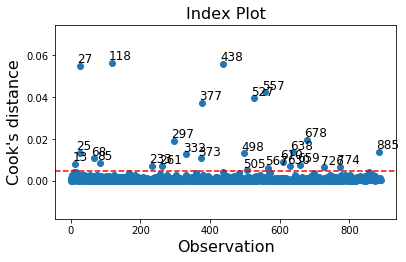

In [67]:
from scipy import stats
import matplotlib.pyplot as plt
# The instance containing methods to calculate the main 
#influence and outlier measures for the ols regression
influence = logit_results.get_influence()
# data frame with summary results 
summary_df = influence.summary_frame()
# save all rows in cooks_d column using .loc[]
diagnosis_df = summary_df.loc[:,['cooks_d']]
# append absolute standardized residual values to new data frame
# take logit of these values (x * log(x))
diagnosis_df['std_resid'] = stats.zscore(logit_results.resid_pearson)
diagnosis_df['std_resid'] = diagnosis_df.loc[:,'std_resid'].apply(lambda x: x * np.log(x))
diagnosis_df.sort_values('cooks_d',ascending=False)
cook_threshold = 4/len(df)
print(f"Threshold for Cook Distance = {cook_threshold}")
# statsmodel .plot_index, y_var = plotted on y axis , 
# threshold = adding annotation for observation labels
# Show results 
fig = influence.plot_index(y_var="cooks",threshold=cook_threshold)
plt.axhline(y=cook_threshold,ls='--',color='red')
fig.tight_layout(pad=2)
# find number of observations that exceed Cook's Distance threshold 
outliers = diagnosis_df[diagnosis_df['cooks_d']>cook_threshold]
proportional_outliers = round(100*(len(outliers)) / len(df),1)
print(f"Proportion of data points that are highly influential: {proportional_outliers}")

extreme = df[df['cooks_d'] > cook_threshold & (diagnosis_df['std_resid'] > 3)]
proportional_extreme = round(100*len(extreme) / len(df),1)
print("Proportion of highly influential outliers: {proportional_extreme}")
extreme.sort_values('cooks_d',ascending=False).head()

In [69]:
extreme.sort_values('cooks_d',ascending=False).head()

NameError: name 'extreme' is not defined

In [71]:
df.head()

,Age,Fare,Log_Age,Log_Fare,const
0,22.0,7.2500,68.002934,14.362261,1.0
1,38.0,71.2833,138.228274,304.141753,1.0
2,26.0,7.9250,84.710510,16.404927,1.0
3,35.0,53.1000,124.437182,210.922595,1.0
4,35.0,8.0500,124.437182,16.789660,1.0


In [70]:
extreme = df[df['cooks_d'] > cook_threshold & (diagnosis_df['std_resid'] > 3)]

KeyError: 'cooks_d'

In [68]:
# extreme outlier
df.iloc[297]

Age               NaN
Fare        23.250000
Log_Age           NaN
Log_Fare    73.151594
const        1.000000
Name: 301, dtype: float64

In [64]:
#from statsmodels import resid_pearson

In [65]:
#resid_pearson()

In [30]:
import numpy as np
df.dropna(inplace=True)
df.isnull().sum()
# drop categorical variables
df.drop(['Name','Sex','Ticket','Cabin','Embarked'],inplace=True,axis = 1)
vif = pd.DataFrame()
vif['variables'] = df.columns
vif['vif'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif
df = pd.read_csv('data/titanic/train.csv')
df.Survived.unique()
len(df)
# 
df['Age_Log_Age'] = df.Age.apply(lambda x: x * np.log(x))
df['Fare_Log_Fare'] = df.Fare.apply(lambda x: x * np.log(x))